In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

# Matrix Ranks

In [2]:
p = 3
q = 5

mat1 = np.random.randn(p, q)

# largest possible rank = min(p, q)
# a matrix formed using random numbers will most likely have the maximum possible rank for that matrix size
rank1 = np.linalg.matrix_rank(mat1)
print("Matrix:\n", mat1, "\n\nRank:", rank1)

print('\n\n')

Matrix:
 [[ 0.70025158 -1.7845281   1.08224971  0.2162874  -0.36305497]
 [-0.5638901   1.04243821 -1.10987104 -0.35969946  0.20757224]
 [ 0.00473651 -0.51464251  1.64233593  0.86125075  1.64723562]] 

Rank: 3





In [3]:
p = 3
q = 5
mat2 =  np.random.randn(p, q)

# setting the second column = first column
mat2[:, 0] = mat2[:, 1]
print("Matrix:\n", mat2, "\n\n")

# rank will not be reduced
rank2 = np.linalg.matrix_rank(mat2)
print("Rank:", rank2)
print("\n\n")

Matrix:
 [[ 1.37871462  1.37871462  0.64470934 -0.93313906 -1.8356816 ]
 [-0.60624928 -0.60624928  0.05675855  1.08132022  1.48850793]
 [ 2.33568512  2.33568512  0.30660148 -1.45580606 -0.93863354]] 


Rank: 3





In [4]:
# but what if we perform the same operation on rows instead of columns
# second row = first row

p = 3
q = 5
mat3 =  np.random.randn(p, q)

# setting the second row = first row
mat3[0, :] = mat3[1, :]
print("Matrix:\n", mat3, "\n\n")

# rank will be reduced, because the number of linearly independent rows are now less than 3. So, rank will equal min(p-1, q)
rank3 = np.linalg.matrix_rank(mat3)
print("Rank:", rank3)
print("\n\n")

Matrix:
 [[-0.4006912   0.01524583  2.48244394  0.34321808  1.66604286]
 [-0.4006912   0.01524583  2.48244394  0.34321808  1.66604286]
 [-0.45677514 -0.99537413  0.44021817 -1.67890339 -2.01406128]] 


Rank: 2





## Impact of noise on the matrix rank

In [5]:
p = 3
mat4 =  np.random.randn(p, p)

# setting the second row = first row ===> reducing the rank by 1
mat4[0, :] = mat4[1, :]

rank4 = np.linalg.matrix_rank(mat4)
print("Rank without noise:", rank4)

# adding noise
noise_level = 0.0001
mat5 = mat4  + np.random.randn(p, p) * noise_level

# rank will be reduced, because the number of linearly independent rows are now less than 3. So, rank will equal min(p-1, q)
rank5 = np.linalg.matrix_rank(mat5)
print("Rank with noise:", rank5)
print("\n\n")

Rank without noise: 2
Rank with noise: 3





## Creating a reduced rank matrix using matrix multiplication

In [6]:
## creating a 10 X 10 matrix with Rank 4
mat6 = np.random.randint(-10, 10, (10, 4))
mat7 = np.random.randint(-10, 10, (4, 10))
mat8 = mat6 @ mat7

print(mat8.shape)
print(np.linalg.matrix_rank(mat8))
print("\n\n")

(10, 10)
4





## Generalising the above concept

In [7]:
## creating a m X n matrix with Rank r
m = 7
n = 4
r = 2

mat9 = np.random.randint(-10, 10, (m, r)) @ np.random.randint(-10, 10, (r, n))
print(mat9.shape)
print(np.linalg.matrix_rank(mat9))
print("\n\n")

(7, 4)
2





## Rank of AA' and A'A

In [8]:
## Concept:
# Rank(A) = Rank(A'A) = Rank(A') + Rank(AA')

m = 5
n = 3

mat10 =  np.random.randint(-10, 10, (m, n))
mat11 = mat10.T @ mat10
mat12 = mat10 @ mat10.T

print(np.linalg.matrix_rank(mat11))
print(np.linalg.matrix_rank(mat12))

print('\n\n')

3
3





## Making a matrix full rank matrix (by shifting)

In [9]:
## Rank(A + kI) = full rank <---- where A is a Square matrix 
m = 20
r = 5
k = 5
# crating a matrix of size m X m but with a rank r
mat11 = np.random.randint(-10, 10, (m, r)) @ np.random.randint(-10, 10, (r, m))
print("Reduced Rank:\t", np.linalg.matrix_rank(mat11))

mat12 = mat11 + k * np.eye(m)
print("Full Rank:\t", np.linalg.matrix_rank(mat12))
print("\n\n")

Reduced Rank:	 5
Full Rank:	 20





## Is a vector in the span of a matrix

In [10]:
# column vector
vec1 = np.array([[1, 2, 3, 4]]).T
print(vec1, "\n\n")

# matrices
mat13 = np.vstack(([4, 3, 6, 2], [0, 4, 0, 1])).T
print(mat13, "\n\n")
mat14 = np.vstack(([4, 8, 12, 16], [10, 2, 0, 1])).T
print(mat14, "\n\n")   

# new matrices created by concatenating the vector
mat15 = np.concatenate((mat13, vec1), axis = 1)
print(mat15, "\n\n")
mat16 = np.concatenate((mat14, vec1), axis = 1)
print(mat16, "\n\n")

## If the rank of the new matrix remain the same, then the vector lies in the span of the matrix
print("old rank:", np.linalg.matrix_rank(mat13), "\tnew rank:", np.linalg.matrix_rank(mat15))
print("old rank:", np.linalg.matrix_rank(mat14), "\tnew rank:", np.linalg.matrix_rank(mat16))
print("\n\n")

[[1]
 [2]
 [3]
 [4]] 


[[4 0]
 [3 4]
 [6 0]
 [2 1]] 


[[ 4 10]
 [ 8  2]
 [12  0]
 [16  1]] 


[[4 0 1]
 [3 4 2]
 [6 0 3]
 [2 1 4]] 


[[ 4 10  1]
 [ 8  2  2]
 [12  0  3]
 [16  1  4]] 


old rank: 2 	new rank: 3
old rank: 2 	new rank: 2





---
# Matrix Spaces

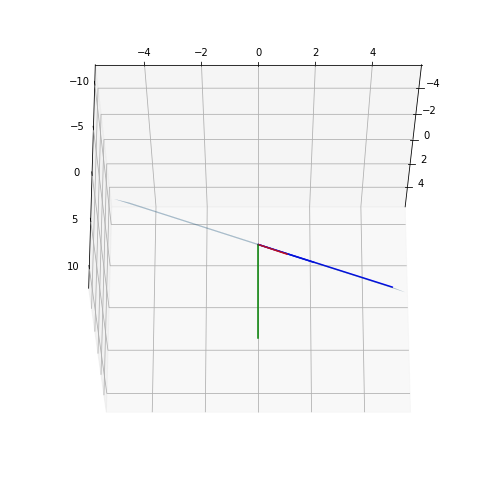

In [12]:
## Is a vector in the column space of a matrix ?
## Can I get the value of say a column vector, from a scaled addition of the columns of the matrix ?

# matrix
mat17 = np.array([ [3, 0], 
                   [5, 2], 
                   [1, 2] ])

# columen vector
vec2 = np.array([[-3], [1], [5]])
vec3 = np.array([[2], [0], [8]])

figure = plt.figure(figsize=(18, 9))
ax = figure.gca(projection = '3d')

# Drawing a plane corresponding to the column space
xx, yy = np.meshgrid(np.linspace(-5, 5, 11), np.linspace(-5, 5, 11))    # grid for x and y- axis
cross_product = np.cross(mat17[:, 0], mat17[:, 1])                      # normal vector to the plane 
z = (-cross_product[0] * xx - cross_product[1] * yy) / cross_product[2] # grid for z axis
ax.plot_surface(xx, yy, z, alpha = 0.4)

# plotting the two column vectors in the matrix
ax.plot([0, mat17[0, 0]], [0, mat17[1, 0]], [0, mat17[2, 0]], 'b')  # 1st column
ax.plot([0, mat17[0, 1]], [0, mat17[1, 1]], [0, mat17[2, 1]], 'b')  # 2nd column

# plotting the vectors
ax.plot([0, vec2[0]], [0, vec2[1]], [0, vec2[2]], 'r')  # vec2 is in the column spance of the matrix
ax.plot([0, vec3[0]], [0, vec3[1]], [0, vec3[2]], 'g')  # vec3 is not in the column space of the matrix

ax.view_init(elev = 155, azim = 0)
plt.show()

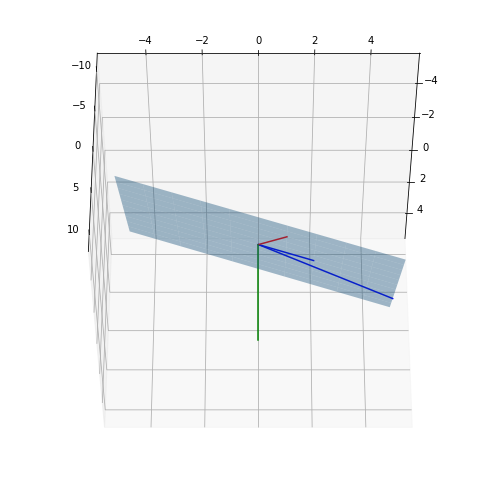

In [13]:
## Visualisation 2.0 (changed the elevation)

figure = plt.figure(figsize=(18, 9))
ax = figure.gca(projection = '3d')

# Drawing a plane corresponding to the column space
xx, yy = np.meshgrid(np.linspace(-5, 5, 11), np.linspace(-5, 5, 11))    # grid for x and y- axis
cross_product = np.cross(mat17[:, 0], mat17[:, 1])                      # normal vector to the plane 
z = (-cross_product[0] * xx - cross_product[1] * yy) / cross_product[2] # grid for z axis
ax.plot_surface(xx, yy, z, alpha = 0.4)

# plotting the two column vectors in the matrix
ax.plot([0, mat17[0, 0]], [0, mat17[1, 0]], [0, mat17[2, 0]], 'b')  # 1st column
ax.plot([0, mat17[0, 1]], [0, mat17[1, 1]], [0, mat17[2, 1]], 'b')  # 2nd column

# plotting the vectors
ax.plot([0, vec2[0]], [0, vec2[1]], [0, vec2[2]], 'r')  # vec2 is in the column spance of the matrix
ax.plot([0, vec3[0]], [0, vec3[1]], [0, vec3[2]], 'g')  # vec3 is not in the column space of the matrix

ax.view_init(elev = 145, azim = 0)
plt.show()